<a href="https://colab.research.google.com/github/Bienbaz/Bienbaz/blob/main/ml_hparameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn scikit-optimize matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.6 MB/s eta 0:00:00


Best Parameters: OrderedDict({'C': 2.9397976202716882, 'gamma': 0.12631575298699974})
Best CV Accuracy: 0.9866666666666667

Top 5 Results:
    mean_fit_time  std_fit_time  mean_score_time  std_score_time     param_C  \
11       0.003866      0.002724         0.004549        0.003626   11.948256   
6        0.006469      0.003822         0.007031        0.001166    2.939798   
22       0.002134      0.000157         0.001685        0.000146    1.768448   
20       0.005935      0.003950         0.004296        0.003306  100.000000   
18       0.003739      0.003633         0.001655        0.000294   25.954727   

    param_gamma                                             params  \
11     0.024396  {'C': 11.948256460778678, 'gamma': 0.024396191...   
6      0.126316  {'C': 2.9397976202716882, 'gamma': 0.126315752...   
22     0.220752  {'C': 1.768447634265959, 'gamma': 0.2207521357...   
20     0.002853       {'C': 100.0, 'gamma': 0.0028525897790512593}   
18     0.015197  {'C': 25.9547

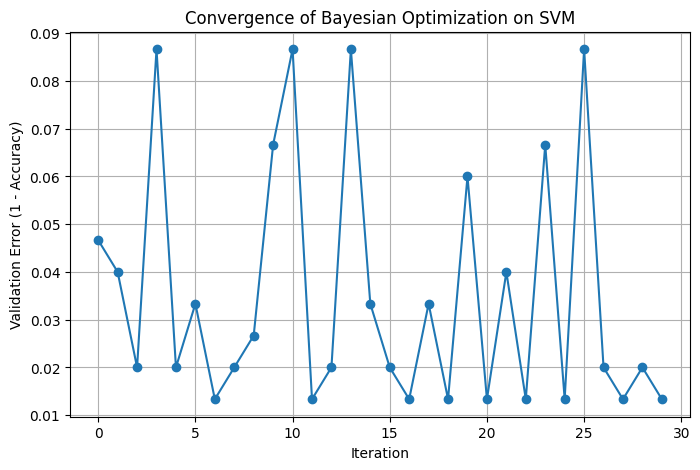

In [2]:
# ========================================
# Question Two: Hyperparameter Optimization
# Dataset: Iris
# Algorithm: Support Vector Machine (SVM, RBF kernel)
# Technique: Bayesian Optimization (BayesSearchCV)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from skopt.space import Real

# -------------------------------
Dataset

iris = datasets.load_iris()
X, y = iris.data, iris.target

# -------------------------------
# Define SVM model

svm = SVC(kernel='rbf')

# -------------------------------
# Define hyperparameter space

search_spaces = {
    'C': Real(1e-2, 1e2, prior='log-uniform'),
    'gamma': Real(1e-4, 1, prior='log-uniform')
}

# -------------------------------
# Bayesian Optimization

opt = BayesSearchCV(
    estimator=svm,
    search_spaces=search_spaces,
    n_iter=30,        # number of optimization iterations
    cv=5,             # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Fit optimizer
opt.fit(X, y)

# -------------------------------
# Output results

print("Best Parameters:", opt.best_params_)
print("Best CV Accuracy:", opt.best_score_)

# Show top results in a DataFrame
results_df = pd.DataFrame(opt.cv_results_)
print("\nTop 5 Results:")
print(results_df.sort_values('mean_test_score', ascending=False).head())

# -------------------------------
# Visualization
# Convergence plot (validation error over iterations)
plt.figure(figsize=(8, 5))
errors = [1 - score for score in opt.cv_results_['mean_test_score']]
plt.plot(errors, marker='o')
plt.xlabel("Iteration")
plt.ylabel("Validation Error (1 - Accuracy)")
plt.title("Convergence of Bayesian Optimization on SVM")
plt.grid(True)
plt.show()
